# EXPLORACION DATA ANALISIS (EDA)

## 1. Importación de Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sweetviz
import sweetviz as sv

### Cargando los datos

In [5]:
df = pd.read_csv("C:/Users/aprats/OneDrive - Fundacio privada quiropractica/VARIOS/AP Personal/ML/bank_dataset.CSV")

### Muestra de las primeras filas

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Información general del dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


### Descripción estadística del dataset

In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Histograma de cada variable numérica

### 1.	Análisis descriptivo básico:
Se exploraron las características del conjunto de datos para la obtención de la información general de las variables y su comportamiento, esto se realizó a través de estadísticas descriptivas y visualizaciones de la distribución de las variables numéricas (histogramas y gráﬁcos de distribución).


### Contar los valores de cada variable categórica

In [15]:
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64
education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64
default
no     10994
yes      168
Name: count, dtype: int64
housing
no     5881
yes    5281
Name: count, dtype: int64
loan
no     9702
yes    1460
Name: count, dtype: int64
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64
poutcome
unknown    8326
failure    1228
success    1071
other       537
Nam

### Visualización de valores nulos

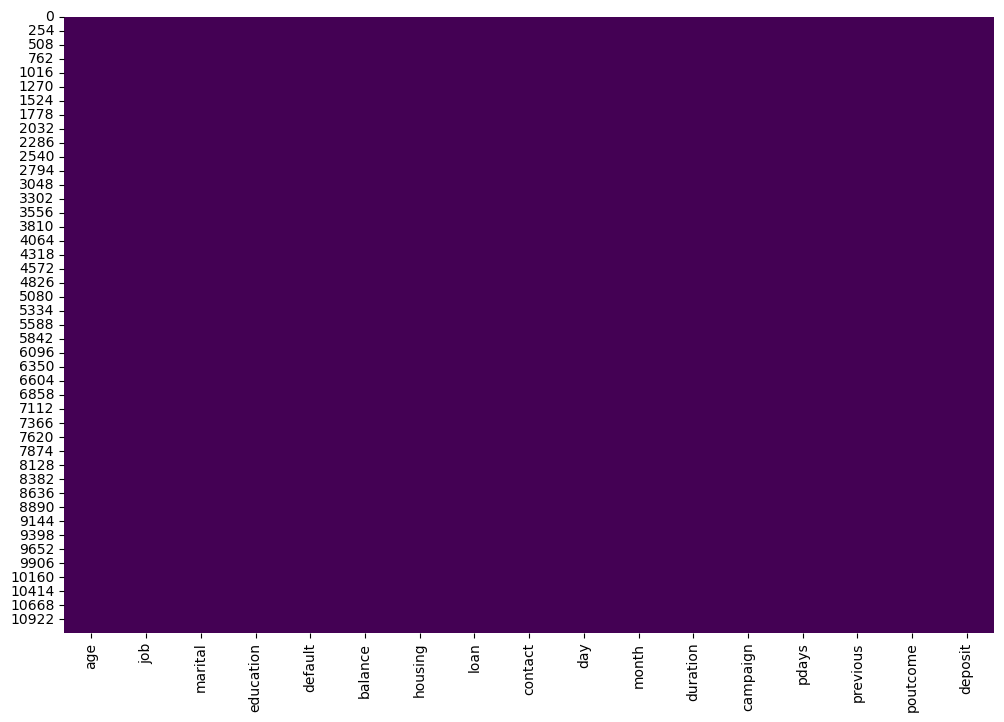

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

### Contar Valores nulos por columnas

In [19]:
df.isnull().sum()

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

### EDA Automatico con Sweetviz

In [21]:
report = sv.analyze(df)
report.show_html('EDA_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 2.Detección y gestión de valores faltantes:
Se identiﬁcó que el conjunto de datos hay valores faltantes los cuales son: 
•	age: 10 valores faltantes. 
•	marital: 5 valores faltantes. 
•	education: 7 valores faltantes.

En el gráﬁco heatmap se visualiza los valores faltantes no son significativos, pero a pesar de ello se decide que estos valores sean gestionados o reemplazados por valores que se conseguirán a través de la mediana en el caso de “age” ya que es la más idónea al tratarse de datos numéricos ya que representa un valor central, lo cual no se verá afectado por outliers, en cambio si considero la media este valor podría estar influenciado por valores extremos y no nos conviene.
En cuanto a los valores “marital” y “education”, al no tener un significado matemático no se puede calcular una media o una mediana, por esa principal razón se utiliza la moda, tomando así el valor más frecuente, manteniendo la coherencia y una fácil interpretación.



### Gestión de Valores Faltantes

In [24]:
df['age'] = df['age'].fillna(df['age'].median())
df['marital'] = df['marital'].fillna(df['marital'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])



In [25]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


### Detección Outliers con Análisis Estadístico con IQR

In [27]:
for col in df.select_dtypes(include=['float64', 'int64']):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers en {col}: {len(outliers)}")



Outliers en age: 171
Outliers en balance: 1055
Outliers en day: 0
Outliers en duration: 636
Outliers en campaign: 601
Outliers en pdays: 2750
Outliers en previous: 1258


### Gráficos de caja

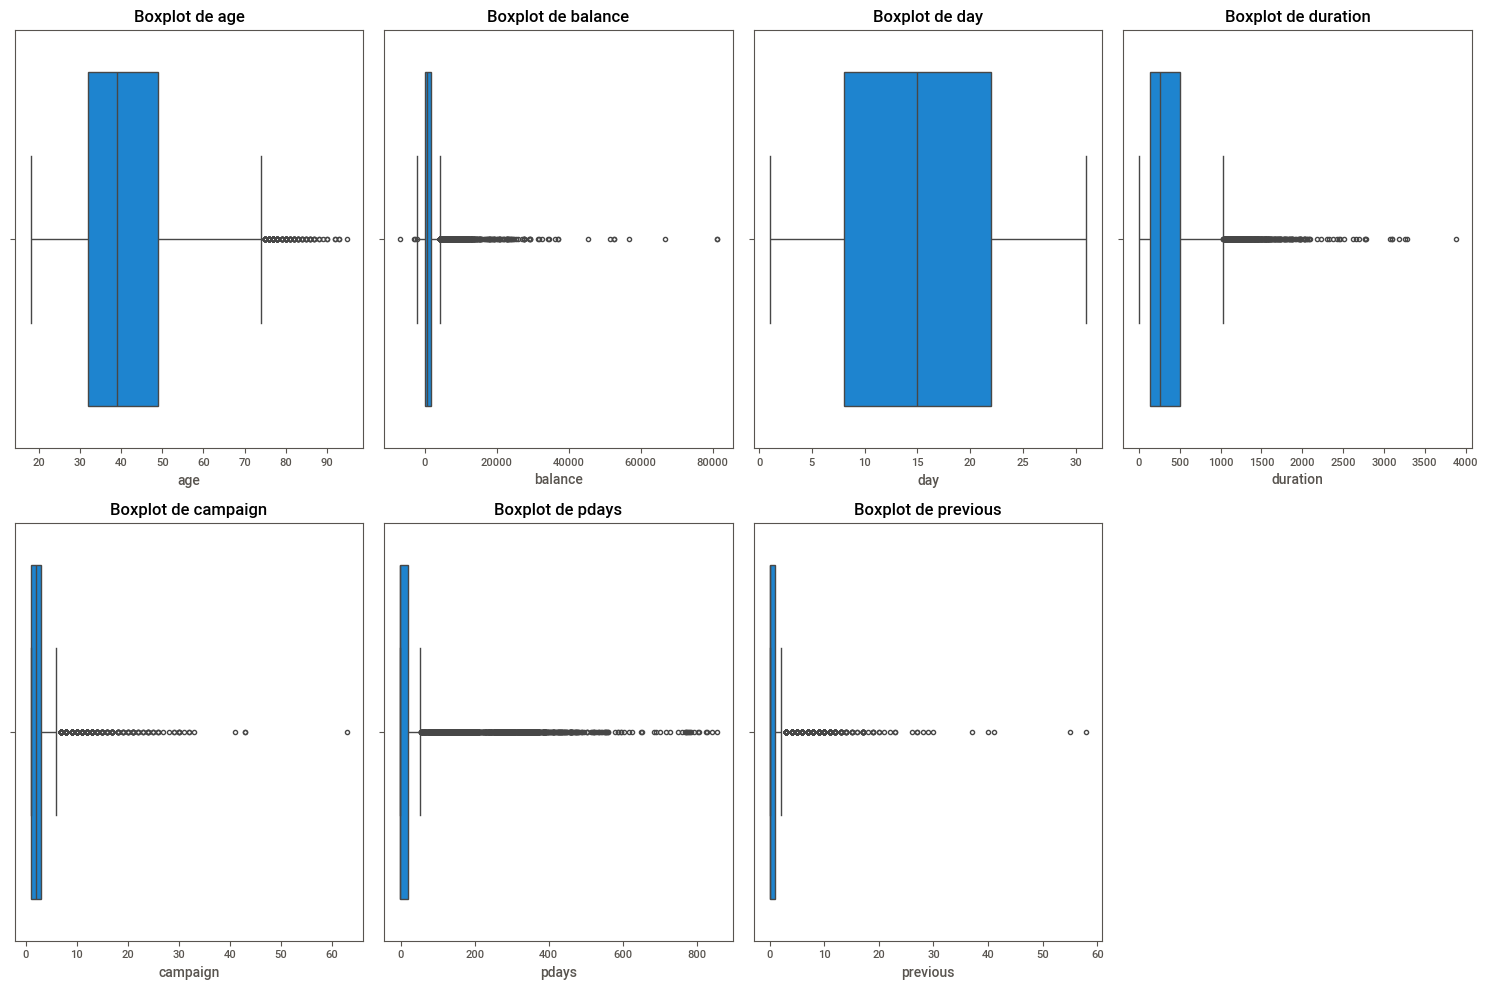

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, len(numeric_columns)//2 + 1, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()


### Reemplazo de outliers con límites superiores e inferiores

In [31]:
for col in df.select_dtypes(include=['float64', 'int64']):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


### 3.	Detección y gestión de outliers:
La decisión de utilizar IQR es por su robustez frente a distribuciones no normales
Se utiliza el método IQR por su robustez, fácil aplicación y útil para detectar y gestionar outliers. Si se combina con bloxplots facilita la visualización y compresión de los resultados, ya que muestran los cuartiles, IQR y los outliers como puntos individuales fuera de los límites, permitiendo ver cual es la columna con más outliers, como por ejemplo se ve en el boxplot de la edad que se concentra entre los 30 y 50 años y a partir de los 70 hay algunos datos pero no son significativos, lo que determina que “age” tiene pocos outliers, las columnas como “balance”, “duration”, etc si tienen mayor cantidad de outliers, pero nuestro proyecto de predicción no se basa en estos datos por lo que no lo considero no representativos
Teniendo en cuenta esto la gestión de los outliers se realiza por reemplazo con límites superiores e inferiores ya que reduce el impacto de los valores extremos que podrían sesgar mi modelo y además preserva los datos originales ajustándolos dentro de un límite


## Interpretación intermedia

In [47]:
descriptive_stats = df.describe()
print(descriptive_stats)
print("La variable 'age' tiene una media de", df['age'].mean(), 
      "y una mediana de", df['age'].median(), 
      ", lo cual indica que la distribución puede estar sesgada.")


                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.153781   1117.352804     15.658036    352.948486      2.238577   
std       11.655459   1349.670734      8.420740    284.714889      1.521158   
min       18.000000  -2257.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       74.500000   4087.000000     31.000000   1033.000000      6.000000   

              pdays      previous  target_encoded  
count  11162.000000  11162.000000    11162.000000  
mean      12.578413      0.485397        0.473840  
std       23.466393      0.892563        0.499338  
min       -1.000000      0.000000        0.000000  
25%       -1.000000      0.0

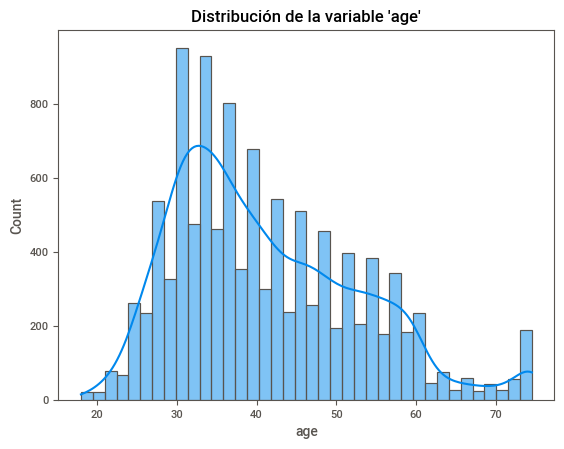

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['age'], kde=True)
plt.title("Distribución de la variable 'age'")
plt.show()


#### Al realizar una interpretación intermedia a través de una descripción estadístico vemos que nuestra distribución esta sesgada hacia la derecha (asimetría positiva), esto nos da la pista par que consideremos Random Forest para mantener la distribución y no ajustar la variable


### Identificación de característica relevante

In [67]:
from scipy.stats import chi2_contingency, ttest_ind

### Análisis para variables numéricas

In [70]:
for col in ['age', 'balance', 'duration']:
    group1 = df[df['deposit'] == 'yes'][col]
    group2 = df[df['deposit'] == 'no'][col]
    stat, p = ttest_ind(group1, group2)
    print(f"Prueba t para {col}: p-valor = {p}")

Prueba t para age: p-valor = 0.0009502750438314823
Prueba t para balance: p-valor = 1.5432610466975973e-48
Prueba t para duration: p-valor = 0.0


#### Para la identificación de valores a utilizar en el modelo, se realizó análisis de variable objetivo numérico, que en este caso se enfoco en los datos de las columnas “age”, “duration”, “balance”lo que nos confirma que “age” es una variable significativa y con mucha fuerza la variable “duration” por lo que se deberán considerar relevantes para el modelo


### Análisis para variables categóricas

In [73]:
contingency = pd.crosstab(df['education'], df['deposit'])
stat, p, _, _ = chi2_contingency(contingency)
print(f"Prueba Chi-cuadrado para 'education': p-valor = {p}")

Prueba Chi-cuadrado para 'education': p-valor = 1.7574584100233152e-26


#### En cuanto a la variable Chi-cuadrado la relación estadística entre “education” y “Deposit” es significativa por lo que también deberá considerarse relevante para el modelo

### 5. Balance de Clases

### Verificación de distribución de variables

In [82]:
print("Distribución de la variable 'deposit':")
print(df['deposit'].value_counts(normalize=True))



Distribución de la variable 'deposit':
deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64


### Visualización de la distribución

C:\Users\aprats\AppData\Local\Temp\ipykernel_26576\3628655874.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='deposit', data=df, palette='viridis')


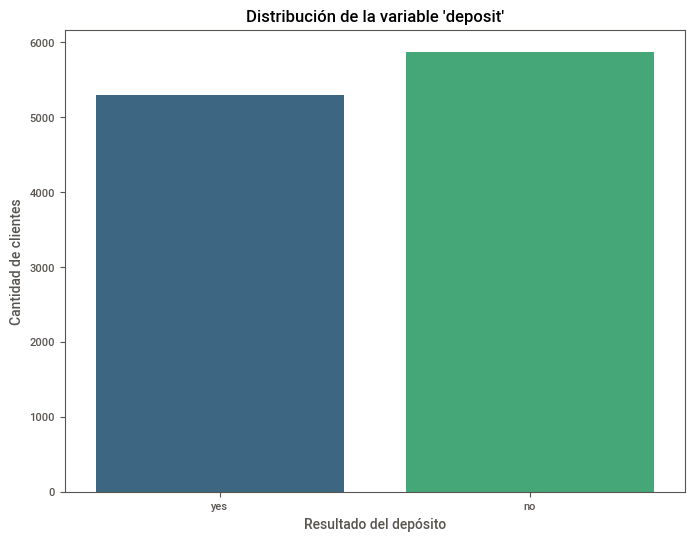

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='deposit', data=df, palette='viridis')
plt.title("Distribución de la variable 'deposit'")
plt.xlabel("Resultado del depósito")
plt.ylabel("Cantidad de clientes")
plt.show()


### No parece necesario aplicar técnicas de balanceo,la distribución está suficientemente equilibrada para entrenar modelos

# Conclusión

###
El Análisis Exploratorio de Datos (EDA) realizado sobre el conjunto de datos bank_dataset.csv ha permitido comprender mejor la estructura, distribución y comportamiento de las variables, así como identificar las relaciones más significativas con la variable “deposit”, la cual es categóricamente binaria “yes” y “no”

El conjunto de datos cuenta con 11,162 registros y múltiples variables numéricas y categóricas que describen características de los clientes y las interacciones con la campaña. Entre las Variables Numéricas están: “age”, “balance”, “duration” y dentro de las variables Categóricas “marital”, “education”, “housing”.

Los patrones detectados a través de la variable objetivo numérico se concluye que “duration”, “balance” y “age” tienen una relación significativa con la variable “deposit”. En este análisis se pudo también comprobar que la “duration” es una variable muy relevante con un p-valor:0.0. en cuanto a las variables categóricas son “education” y “deposit”, siendo “education” como el valor más relevante.

La Distribución de la variable es suficientemente equilibrada por lo que no se requiere aplicar técnicas de balanceo

•	Resumen de Diagnósticos y Transformaciones Realizadas
Se identificaron valores nulos en las variables age, marital y education, Se decidió imputar los valores faltantes con la mediana para age (al ser robusta frente a outliers) y con la moda para las variables categóricas ya que técnicas preservan la información general del dataset sin introducir sesgos significativos.
Los outliers se detectaron mediante el método IQR y se visualizaron con boxplots y los valores extremos se reemplazaron por los límites superior e inferior del IQR para reducir su impacto en los resultados y asegurar una distribución más estable.

•	Identificación de variables relevantes:
A través de análisis  numéricas y Chi-cuadrado se identifican los valores relevantes para el modelo (duration, age y education) 

